In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification #synthetic dataset
from sklearn.feature_selection import SelectKBest, f_classif #ANOVA
from sklearn.decomposition import PCA #Dymentiality reduction
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [5]:
X, y = make_classification(
    n_samples=500,
    n_features=10,
n_informative=5,
n_redundant=3,
n_repeated=2,
random_state=42,
)

In [6]:
X

array([[ 0.36539251,  2.17589077, -1.90154126, ...,  0.36539251,
        -0.57014359,  1.17088601],
       [ 0.27033394,  2.03222652,  1.85923573, ...,  0.27033394,
         0.57891323,  0.46071376],
       [-0.3114802 ,  1.82441488, -2.56662739, ..., -0.3114802 ,
         1.23175453,  0.55573185],
       ...,
       [-3.05191416, -2.67389894,  1.25297661, ..., -3.05191416,
        -2.62845792,  3.14126435],
       [ 2.58014668, -1.48541993, -0.23554459, ...,  2.58014668,
         2.50058851, -1.80960905],
       [ 0.29159801,  1.35256752,  1.30818297, ...,  0.29159801,
         1.06354347,  0.2754444 ]])

In [9]:
feature_names = [f"Feature_{i+1}" for i in range(X.shape[1])]
data = pd.DataFrame(X, columns=feature_names)
data['Target'] = y

In [10]:
data

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Target
0,0.365393,2.175891,-1.901541,1.155482,-0.937128,0.365393,0.637000,0.365393,-0.570144,1.170886,0
1,0.270334,2.032227,1.859236,0.978039,-0.829560,0.270334,3.076069,0.270334,0.578913,0.460714,0
2,-0.311480,1.824415,-2.566627,2.065977,-1.791858,-0.311480,-0.097573,-0.311480,1.231755,0.555732,0
3,1.031703,-1.789377,0.971821,0.215974,0.620152,1.031703,-2.551701,1.031703,2.013369,-1.874659,1
4,0.745957,-1.738867,1.242226,-1.243438,1.625984,0.745957,-1.573781,0.745957,-0.260604,-1.067344,1
...,...,...,...,...,...,...,...,...,...,...,...
495,-1.453426,1.698842,-0.309161,0.082497,0.137802,-1.453426,2.051811,-1.453426,-0.119020,0.331507,1
496,-1.030117,0.768269,-0.679555,1.547205,-2.386968,-1.030117,1.358546,-1.030117,1.368355,0.711368,0
497,-3.051914,-2.673899,1.252977,-1.769336,-3.193075,-3.051914,3.892805,-3.051914,-2.628458,3.141264,1
498,2.580147,-1.485420,-0.235545,1.376543,-0.090310,2.580147,-4.219712,2.580147,2.500589,-1.809609,1


In [13]:
# Feature Selection 
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X, y)

selected_features = np.array(feature_names) [selector.get_support()]
print(f"Selected Features (ANOVA): {selected_features}")

Selected Features (ANOVA): ['Feature_2' 'Feature_4' 'Feature_5' 'Feature_6' 'Feature_8']


In [14]:
# Feature Selection 
selector = SelectKBest(score_func=f_classif, k=1)
X_selected = selector.fit_transform(X, y)

selected_features = np.array(feature_names) [selector.get_support()]
print(f"Selected Features (ANOVA): {selected_features}")

Selected Features (ANOVA): ['Feature_4']


In [15]:
# Feature Selection 
selector = SelectKBest(score_func=f_classif, k=4)
X_selected = selector.fit_transform(X, y)

selected_features = np.array(feature_names) [selector.get_support()]
print(f"Selected Features (ANOVA): {selected_features}")

Selected Features (ANOVA): ['Feature_2' 'Feature_4' 'Feature_5' 'Feature_8']


In [16]:
# Feature Extraction
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(f"PCA Components Shape: {X_pca.shape}")

PCA Components Shape: (500, 2)


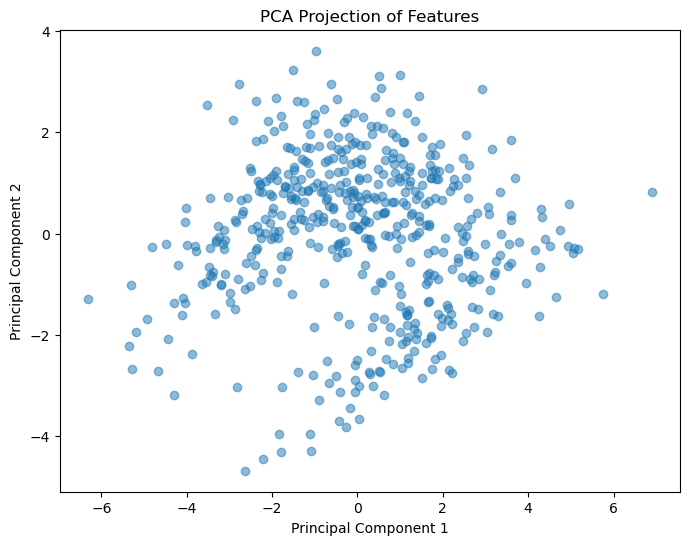

In [17]:
#Visualize the PCA Components 

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection of Features")
plt.show()

In [18]:
# Split the Data for training & testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

print(f"Training Set Shape: {X_train.shape}")
print(f"Testing Set Shape: {X_test.shape}")

Training Set Shape: (400, 2)
Testing Set Shape: (100, 2)


In [19]:
# Choose & Train a Machine Learning Model

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [20]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

In [21]:
# Evaluate Model Performace 
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error: 0.15
R-squared Score: 0.41


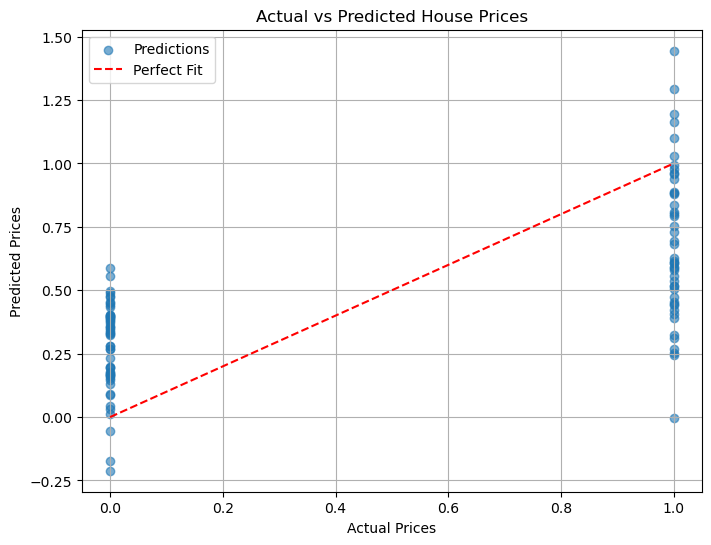

In [22]:
# Plot the Best-Fit Line (for Linear Regression)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, label="Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--", label="Perfect Fit")  # Best-fit line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.grid(True)
plt.show()